In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from time import time

from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.lda import LDA
from sklearn.neighbors import KNeighborsClassifier

c:\users\felip\anaconda3\envs\tensorflow\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [2]:
Xdf_raw = pd.read_csv("../IndoorFingerprint.csv").drop("Y", axis=1)
Ydf_raw = pd.read_csv("../IndoorFingerprint.csv").drop("X", axis=1)

In [3]:
atribute_numbers = Xdf_raw.shape[1]-1

In [4]:
# Se normalizan los datos para ambos
scaler = preprocessing.StandardScaler()
Xdf_raw.iloc[:, 1:atribute_numbers+1] = scaler.fit_transform(Xdf_raw.iloc[:, 1:atribute_numbers+1])
X_std = Xdf_raw.iloc[:, 1:atribute_numbers+1]
y = Xdf_raw.iloc[:,0]

mclasses= sorted(list(set(y)))
N = len(mclasses)

In [5]:
import seaborn as sns
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('Paired') # Paleta de color cualitativo para diferenciar cada clase
mcolors = [cmap(i) for i in np.linspace(0,1,N)]

plt.figure(figsize=(10, 8))

for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0], Xred_pca[y==lab, 1], label=lab, c=col, edgecolors='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='best', fancybox=True)
sns.set()


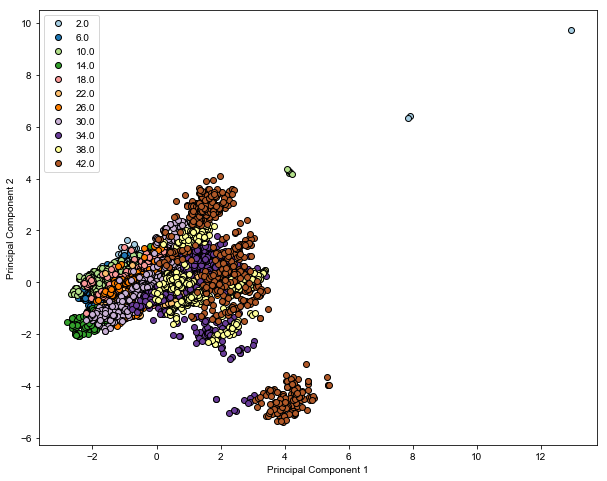

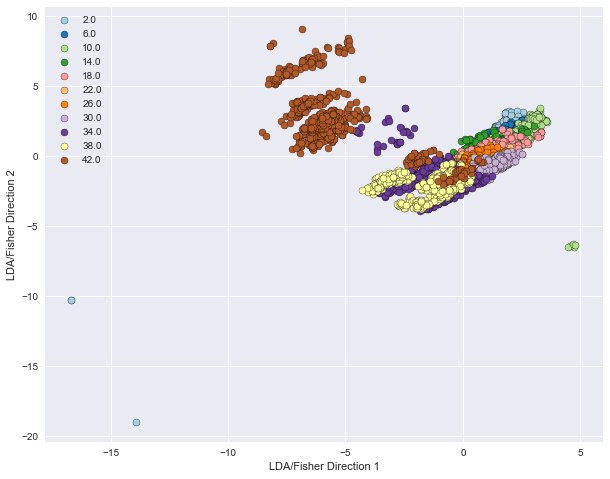

In [6]:
sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('Paired') # Paleta de color cualitativo para diferenciar cada clase
plt.figure(figsize=(10, 8))

for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0], Xred_lda[y==lab, 1], label=lab, c=col, edgecolors='black')

plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='best', fancybox=True)

plt.show()

# Analisis de componentes PCA

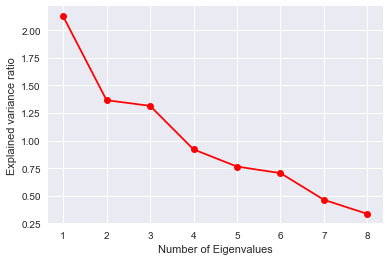

In [7]:
#for i in range(1,9):
#    sklearn_pca = PCA(n_components=i)
n_components = [i for i in range(1,9)]
sklearn_pca = PCA(n_components=8)
Xred_pca = sklearn_pca.fit_transform(X_std)
plt.plot(n_components, sklearn_pca.explained_variance_, 'o-', color="r",
             label="Explained variance")

plt.xlabel("Number of Eigenvalues")
plt.ylabel("Explained variance ratio")
sns.set()
plt.show()

# Comparativa clasificadores

In [8]:
def plot_learning_curve(estimator, X, y, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)


    '''plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")'''
    '''plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")'''
    '''plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label=label)'''
    return test_scores_mean[-1]

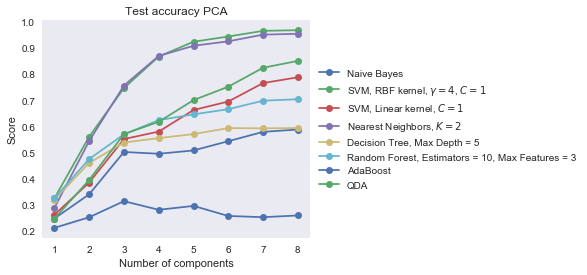

In [9]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve


plt.figure()
ax = plt.subplot(111)
plt.title("Test accuracy PCA")
plt.xlabel("Number of components")
plt.ylabel("Score")
ax.grid()

estimatorNB = []
estimatorSVCR = []
estimatorSVCL = []
estimatorKNN = []
estimatorDT = []
estimatorRF = []
estimatorADA = []
estimatorQDA = []

for i in range(1,atribute_numbers + 1):
    sklearn_pca = PCA(n_components=i)
    Xred_pca = sklearn_pca.fit_transform(X_std)
    
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    estimator = GaussianNB()
    estimatorNB.append(plot_learning_curve(estimator, Xred_pca, y, cv=cv, n_jobs=4))

    # SVC is more expensive so we do a lower number of CV iterations:
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = SVC(gamma=4, C=1)
    estimatorSVCR.append(plot_learning_curve(estimator, Xred_pca, y, cv=cv, n_jobs=4))

    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = SVC(kernel="linear", C=1)
    estimatorSVCL.append(plot_learning_curve(estimator, Xred_pca, y, cv=cv, n_jobs=4))

    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = KNeighborsClassifier(2)
    estimatorKNN.append(plot_learning_curve(estimator, Xred_pca, y, cv=cv, n_jobs=4))

    cv = ShuffleSplit(n_splits=10,test_size=0.2, random_state=0)
    estimator = DecisionTreeClassifier(max_depth=5)
    estimatorDT.append(plot_learning_curve(estimator, Xred_pca, y, cv=cv, n_jobs=4))

    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    estimator = RandomForestClassifier(max_depth=5, n_estimators=10)
    estimatorRF.append(plot_learning_curve(estimator, Xred_pca, y, cv=cv, n_jobs=4))

    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = AdaBoostClassifier()
    estimatorADA.append(plot_learning_curve(estimator, Xred_pca, y, cv=cv, n_jobs=4))
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = QuadraticDiscriminantAnalysis()
    estimatorQDA.append(plot_learning_curve(estimator, Xred_pca, y, cv=cv, n_jobs=4))
    

ax.plot(range(1,atribute_numbers + 1), estimatorNB, 'o-', label="Naive Bayes")
ax.plot(range(1,atribute_numbers + 1), estimatorSVCR, 'o-', label="SVM, RBF kernel, $\gamma=4$, $C=1$")
ax.plot(range(1,atribute_numbers + 1), estimatorSVCL, 'o-', label="SVM, Linear kernel, $C=1$")
ax.plot(range(1,atribute_numbers + 1), estimatorKNN, 'o-', label="Nearest Neighbors, $K=2$")
ax.plot(range(1,atribute_numbers + 1), estimatorDT, 'o-', label="Decision Tree, Max Depth = 5")
ax.plot(range(1,atribute_numbers + 1), estimatorRF, 'o-', label="Random Forest, Estimators = 10, Max Features = 3")
ax.plot(range(1,atribute_numbers + 1), estimatorADA, 'o-', label="AdaBoost")
ax.plot(range(1,atribute_numbers + 1), estimatorQDA, 'o-', label="QDA")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
